## Linear Congruential Generator (LCG)

The **Linear Congruential Generator (LCG)** is one of the oldest and simplest methods for generating pseudorandom numbers.  
It is defined by the recurrence relation:

$$ x_{n+1} = (a x_n + c) \mod m $$

where:  
- $a$ is the **multiplier**  
- $c$ is the **increment**  
- $m$ is the **modulus**  
- $x_n$ is the current state (or seed for the first iteration)

### **Key Properties**
- LCG is **deterministic** and produces a **predictable** sequence.
- It can have **good randomness properties** if well-tuned values of $a$, $c$, and $m$ are chosen.
- However, **poor choices** can lead to highly correlated numbers and shorter cycles.
- LCG is **not suitable for high-dimensional Monte Carlo simulations** or cryptographic applications.

The following code implements a simple LCG and visualizes its output.


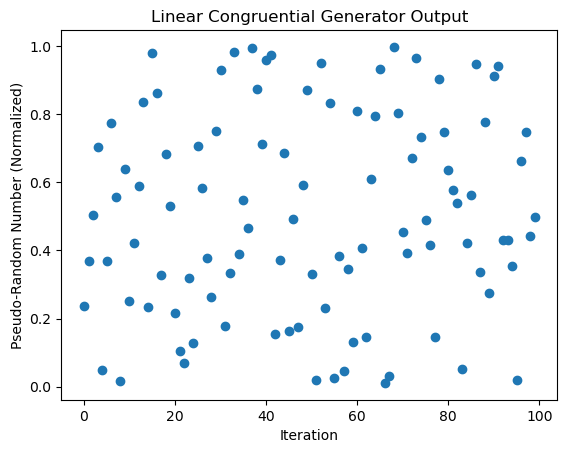

In [2]:
import matplotlib.pyplot as plt

# Linear Congruential Generator (LCG) parameters
a = 1664525      # Multiplier
c = 1013904223   # Increment
m = 2**32        # Modulus
seed = 1         # Initial seed

# Number of random numbers to generate
N = 100

def linear_congruential_generator(a, c, m, seed, N):
    x = seed
    results = []
    
    for _ in range(N):
        x = (a * x + c) % m
        results.append(x / m)  # Normalize to range [0,1]
    
    return results

# Generate random numbers
random_numbers = linear_congruential_generator(a, c, m, seed, N)

# Plot the generated sequence
plt.plot(random_numbers, "o")
plt.xlabel("Iteration")
plt.ylabel("Pseudo-Random Number (Normalized)")
plt.title("Linear Congruential Generator Output")
plt.show()


## Mersenne Twister (MT19937)

The **Mersenne Twister** is a pseudorandom number generator that improves upon the LCG by providing:
- A very **long period** of $$2^{19937} - 1$$.
- Better **statistical randomness properties**.
- Low computational cost.
- **No short cycles** or strong correlations, unlike LCG.

It was the **default PRNG in Python’s `random` module** and in **NumPy before version 1.17**.

The following code demonstrates how to use the **Mersenne Twister with a seed**.



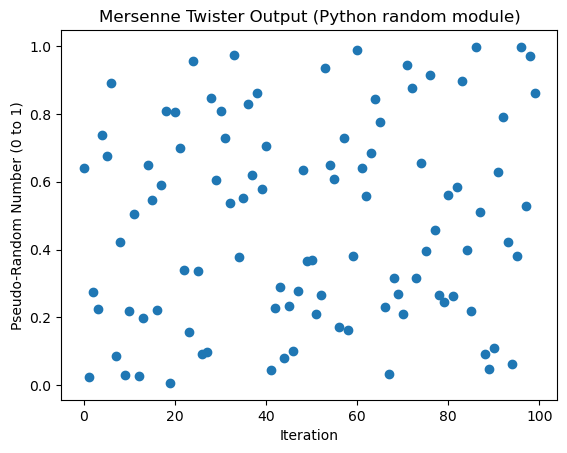

In [5]:
import random
import matplotlib.pyplot as plt

# Set a fixed seed for reproducibility
random.seed(42)

# Generate 100 random numbers using Mersenne Twister
N = 100
random_numbers = [random.random() for _ in range(N)]

# Plot the results
plt.plot(random_numbers, "o")
plt.xlabel("Iteration")
plt.ylabel("Pseudo-Random Number (0 to 1)")
plt.title("Mersenne Twister Output (Python random module)")
plt.show()


## NumPy’s PCG64 (Default PRNG)

NumPy now **defaults to `PCG64` instead of Mersenne Twister**.  
PCG (Permuted Congruential Generator) is:
- **Faster** than Mersenne Twister.
- **More statistically robust**.
- **More secure** against reverse-engineering.
- Still **not cryptographically secure**, but better for Monte Carlo simulations.


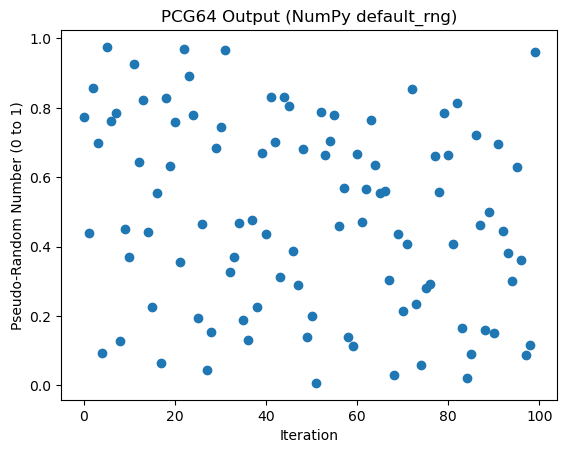

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Create a PCG64-based random number generator with a fixed seed
rng = np.random.default_rng(42)

# Generate 100 random numbers using PCG64
N = 100
random_numbers = rng.random(N)

# Plot the results
plt.plot(random_numbers, "o")
plt.xlabel("Iteration")
plt.ylabel("Pseudo-Random Number (0 to 1)")
plt.title("PCG64 Output (NumPy default_rng)")
plt.show()


## Summary: Which PRNG Should You Use?

| PRNG Algorithm | Period | Speed | Randomness Quality | Best For |
|---------------|--------|-------|--------------------|----------|
| **LCG** (Linear Congruential) | Short | Very Fast | Poor (Correlations, Short Cycle) | Teaching PRNG concepts, simple cases |
| **Mersenne Twister (MT19937)** | $$2^{19937} - 1$$ | Fast | Good (But Weak in High Dimensions) | General-purpose simulations, Monte Carlo (Legacy) |
| **PCG64** (NumPy’s Default) | $$2^{128}$$ | Faster | Excellent (Fewer Correlations, More Uniform) | Recommended for numerical work |

### **Key Takeaways**
- **Use `np.random.default_rng(seed)` instead of `np.random.seed()`** for computational physics applications.
- **LCG is outdated** but useful for teaching PRNG concepts.
- **Mersenne Twister (MT19937) is still good but has minor weaknesses in high-dimensional simulations.**
- **PCG64 is the best choice for modern scientific computing due to better statistical properties and efficiency.**


# Generating Random Integers with NumPy's PCG64 Generator

NumPy provides efficient methods for generating **random integers** using the **PCG64-based generator**.

## Key Methods:

- **`rng.integers(low, high, size)`**  
  Generates uniformly distributed random integers in the range `[low, high)`.  

  - If `size` is **not specified**, it returns a **single random integer**.  
  - If `size` is an **integer `N`**, it returns an **array of `N` random numbers**.  

- **`rng.choice(array, size)`**  
  Randomly selects values from a given set of integers.  

Below, we demonstrate how to use these methods to generate sequences of random integers with different values of `size`.


In [14]:
import numpy as np

# Initialize the random number generator (PCG64-based)
rng = np.random.default_rng()

# Generate 10 random integers between 1 and 100 (inclusive of 1, exclusive of 100)
random_integers = rng.integers(1, 100, size=10)
print("Random integers (1 to 99):", random_integers)

# Generate 3 random selections from a predefined set of integers
values = [10, 20, 30, 40, 50]
random_choices = rng.choice(values, size=3)
print("Random choices from [10, 20, 30, 40, 50]:", random_choices)


Random integers (1 to 99): [18 49 21 88  4 46 24 14 48 74]
Random choices from [10, 20, 30, 40, 50]: [10 10 20]


## **The Inverse Transform Method for Sampling from any Probability Distribution**

### **Step 1: General Formula for Transforming a Random Variable**
Suppose we have a random variable $x$ and define a new variable $E$ as:
$$
E = f(x).
$$

We want to determine how $E$ is distributed. The probability density function of $E$, which we denote as $P_f(E)$, is given by the standard transformation formula:
$$
P_f(E) = \int \delta(E - f(x)) p_x(x) dx.
$$

If $x$ is uniformly distributed in $[0,1]$, then $p_x(x) = 1$, so this simplifies to:
$$
P_f(E) = \int_0^1 \delta(E - f(x)) dx.
$$

### **Step 2: Choosing $f(x)$ to Obtain the Desired Distribution**
Now, we choose:
$$
f(x) = F^{-1}(x),
$$
where $F(E)$ is the cumulative distribution function (CDF) of a given probability density function $p(E)$:
$$
F(E) = \int_{E_{\min}}^E p(E') dE'.
$$

With this choice, we substitute into the formula for $P_f(E)$:
$$
P_f(E) = \int_0^1 \delta(E - F^{-1}(x)) dx.
$$

Using the standard transformation property of the $\delta$-function:
$$
\delta(E - F^{-1}(x)) = \frac{\delta(x - F(E))}{|\frac{dF^{-1}(x)}{dx}|} 
= \delta(x - F(E))\left|
F'(F^{-1}(x))
\right|
= \delta(x - F(E))\left|
F'(E)
\right|
= \delta(x - F(E))\left|
p(E)
\right|
= \delta(x - F(E))
p(E)
\,,
$$
we obtain:
$$
P_f(E) = \int_0^1 dx\, \delta(x - F(E)) p(E) = p(E)
\,.
$$

### **Conclusion**
By defining:
$$
E = F^{-1}(x),
$$
where $x$ is uniformly distributed in $[0,1]$ and $F(E) = \int_{E_{\min}}^E p(E') dE'$, we obtain samples distributed according to the desired probability density function $p(E)$. This provides a practical method for generating random samples from $p(E)$ using a uniform random number generator.


## **Applying the Inverse Transform Method to a Truncated Exponential Distribution**
Now, we apply the inverse transform method to the specific case where we want to generate samples from the **truncated exponential distribution**:
$$
p(E) = \frac{e^{-\beta E}}{Z}, \quad 0 \leq E \leq E_{\max},
$$
where the normalization factor is:
$$
Z = \frac{1 - e^{-\beta E_{\max}}}{\beta}.
$$
### **Step 1: Computing the CDF**
The cumulative distribution function (CDF) is obtained by integrating $p(E)$:
$$
F(E) = \int_0^E \frac{e^{-\beta E'}}{Z} dE'.
$$
Evaluating the integral,
$$
F(E) = \frac{1 - e^{-\beta E}}{\beta Z}=\frac{1 - e^{-\beta E}}{1 - e^{-\beta E_{\max}}}
\,.
$$
### **Step 2: Finding the Inverse Function**
To generate samples using the inverse transform method, we solve for $E$ in terms of $x$ given:
$$
x = F(E) = \frac{1 - e^{-\beta E}}{\beta Z}.
$$
Rearranging,
$$
1 - x\beta Z = e^{-\beta E}.
$$
Taking the natural logarithm,
$$
E = -\frac{1}{\beta} \ln(1 - x\beta Z) = F^{-1}(x).
$$
### **Step 3: Generating Samples**
Thus, to generate a random sample $E$ from the distribution: 
$$p(E) = \frac{e^{-\beta E}}{Z}, \quad 0 \leq E \leq E_{\max}\,:$$
1. Draw a uniform random number $x \sim U(0,1)$.
2. Compute:
   $$
   E = -\frac{1}{\beta} \ln(1 - x\beta Z).
   $$

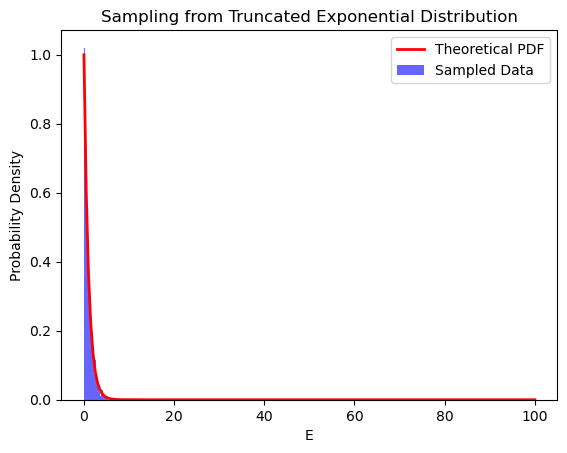

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Create a PCG64-based random number generator with a fixed seed
rng = np.random.default_rng(42)

# Parameters for the truncated exponential distribution
N = 1000
beta = 1.0  # Can be changed to any positive value
E_max = 100.0
Z = (1 - np.exp(-beta * E_max)) / beta  # Normalization factor

# Generate uniform random numbers
x_samples = rng.random(N)  

# Apply the inverse transform sampling
E_samples = - (1 / beta) * np.log(1 - x_samples *beta * Z)  

# Plot the histogram of sampled values
plt.hist(E_samples, bins=40, density=True, alpha=0.6, color='b')

# Overlay the theoretical truncated exponential distribution
E_vals = np.linspace(0, E_max, 200)
pdf_vals = np.exp(-beta * E_vals) / Z  
plt.plot(E_vals, pdf_vals, 'r-', linewidth=2, label="Theoretical PDF")

# Set legend entries
plt.legend(["Theoretical PDF", "Sampled Data"])
plt.xlabel("E")
plt.ylabel("Probability Density")
plt.title("Sampling from Truncated Exponential Distribution")
plt.show()